# 1. Préparation des données et extraction des transcriptions

In [119]:
import os
import pandas as pd
pd.set_option('display.max_colwidth', None)


In [2]:
# Charger les transcriptions
df = pd.read_excel("C:/Users/Christian/Desktop/YembaTones/dataset2.xlsx")


In [3]:
df.tail()

,WordId,Yemba,Speaker,GroupeId,Statement,Syllabe 1,Tone 1,Syllabe 2,Tone 2,Syllabe 3,Tone 3
3779,3780,lezēn,11,146,2,le,bas,zēn,moyen,NaN,NaN
3780,3781,nzeŋ,11,147,1,n,bas,zeŋ,bas,NaN,NaN
3781,3782,nzéŋ,11,147,2,n,bas,zéŋ,haut,NaN,NaN
3782,3783,nzɔ̄ŋ,11,148,1,n,bas,zɔ̄ŋ,moyen,NaN,NaN
3783,3784,nzɔŋ,11,148,2,n,bas,zɔŋ,bas,NaN,NaN


In [4]:
print(df.isnull().sum())

WordId          0
Yemba           0
Speaker         0
GroupeId        0
Statement       0
Syllabe 1       0
Tone 1          0
Syllabe 2      22
Tone 2         22
Syllabe 3    3762
Tone 3       3762
dtype: int64


In [5]:
# Remplacement des valeurs manquates
df["Syllabe 2"] = df["Syllabe 2"].fillna("∅")
df["Tone 2"]    = df["Tone 2"].fillna("∅")
df["Syllabe 3"] = df["Syllabe 3"].fillna("∅")
df["Tone 3"]    = df["Tone 3"].fillna("∅")

In [6]:
# Génère les chemins des fichiers audio associés
def get_audio_path(row):
    return f"C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_{row['Speaker']}/group_{row['GroupeId']}/spkr_{row['Speaker']}_group_{row['GroupeId']}_statement_{int(row['Statement'])}.wav"

df["audio_path"] = df.apply(get_audio_path, axis=1)

In [7]:
df.tail()

,WordId,Yemba,Speaker,GroupeId,Statement,Syllabe 1,Tone 1,Syllabe 2,Tone 2,Syllabe 3,Tone 3,audio_path
3779,3780,lezēn,11,146,2,le,bas,zēn,moyen,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_146/spkr_11_group_146_statement_2.wav
3780,3781,nzeŋ,11,147,1,n,bas,zeŋ,bas,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_147/spkr_11_group_147_statement_1.wav
3781,3782,nzéŋ,11,147,2,n,bas,zéŋ,haut,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_147/spkr_11_group_147_statement_2.wav
3782,3783,nzɔ̄ŋ,11,148,1,n,bas,zɔ̄ŋ,moyen,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_148/spkr_11_group_148_statement_1.wav
3783,3784,nzɔŋ,11,148,2,n,bas,zɔŋ,bas,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_148/spkr_11_group_148_statement_2.wav


In [8]:
# Combiner les syllabes avec tons pour créer une transcription syllabique
def combine_syllables(row):
    syllables = []
    for i in range(1, 4):
        syll = row.get(f"Syllabe {i}")
        tone = row.get(f"Tone {i}")
        if pd.notnull(syll) and pd.notnull(tone):
            syllables.append(f"{syll}|{tone}")
    return " ".join(syllables)

df["syllable_transcript"] = df.apply(combine_syllables, axis=1)

In [9]:
df.head()

,WordId,Yemba,Speaker,GroupeId,Statement,Syllabe 1,Tone 1,Syllabe 2,Tone 2,Syllabe 3,Tone 3,audio_path,syllable_transcript
0,1,Apa,1,1,1,a,bas,pa,bas,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_1/spkr_1_group_1_statement_1.wav,a|bas pa|bas ∅|∅
1,2,Apā,1,1,2,a,bas,pā,moyen,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_1/spkr_1_group_1_statement_2.wav,a|bas pā|moyen ∅|∅
2,3,Apá,1,1,3,a,bas,pá,haut,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_1/spkr_1_group_1_statement_3.wav,a|bas pá|haut ∅|∅
3,4,Api,1,2,1,a,bas,pi,bas,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_2/spkr_1_group_2_statement_1.wav,a|bas pi|bas ∅|∅
4,5,Apī,1,2,2,a,bas,pī,moyen,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_2/spkr_1_group_2_statement_2.wav,a|bas pī|moyen ∅|∅


# 2. Extraction des caractéristiques audio avec MelSpectrogram

In [10]:
import torchaudio
import torch

def extract_melspectrogram(file_path, sample_rate=16000, n_mels=80):
    try:
        waveform, sr = torchaudio.load(file_path)

        # Force mono (si 2 canaux, on moyenne)
        if waveform.shape[0] > 1:
            waveform = waveform.mean(dim=0, keepdim=True)

        # Resample si nécessaire
        if sr != sample_rate:
            resampler = torchaudio.transforms.Resample(sr, sample_rate)
            waveform = resampler(waveform)

        # Transformer Mel spectrogramme
        mel_transform = torchaudio.transforms.MelSpectrogram(
            sample_rate=sample_rate,
            n_fft=1024,
            hop_length=256,
            n_mels=n_mels
        )
        mel_spec = mel_transform(waveform)

        # Convertir en dB
        mel_spec = torchaudio.transforms.AmplitudeToDB()(mel_spec)

        # [1, F, T] → [T, F]
        mel_spec = mel_spec.squeeze(0).transpose(0, 1)

        # Vérifier la forme finale
        if mel_spec.shape[1] != n_mels:
            raise ValueError(f"Mel spectrogram with invalid feature size: {mel_spec.shape}")

        return mel_spec

    except Exception as e:
        #print(f"Erreur lors du traitement de {file_path}: {e}")
        raise e


# 3. Tokenisation syllabique et construction du vocabulaire

In [11]:
from collections import Counter

# Créer un vocabulaire syllabique
syllables = df["syllable_transcript"].str.split().sum()
syllable_counts = Counter(syllables)
vocab = {s: i + 1 for i, s in enumerate(sorted(syllable_counts))}
vocab["<BLANK>"] = 0  # pour CTC

# Encodage des transcriptions
def encode_transcript(syllable_transcript):
    return [vocab[s] for s in syllable_transcript.split()]

df["encoded"] = df["syllable_transcript"].map(encode_transcript)

In [12]:
df.head()

,WordId,Yemba,Speaker,GroupeId,Statement,Syllabe 1,Tone 1,Syllabe 2,Tone 2,Syllabe 3,Tone 3,audio_path,syllable_transcript,encoded
0,1,Apa,1,1,1,a,bas,pa,bas,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_1/spkr_1_group_1_statement_1.wav,a|bas pa|bas ∅|∅,"[11, 200, 314]"
1,2,Apā,1,1,2,a,bas,pā,moyen,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_1/spkr_1_group_1_statement_2.wav,a|bas pā|moyen ∅|∅,"[11, 203, 314]"
2,3,Apá,1,1,3,a,bas,pá,haut,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_1/spkr_1_group_1_statement_3.wav,a|bas pá|haut ∅|∅,"[11, 201, 314]"
3,4,Api,1,2,1,a,bas,pi,bas,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_2/spkr_1_group_2_statement_1.wav,a|bas pi|bas ∅|∅,"[11, 209, 314]"
4,5,Apī,1,2,2,a,bas,pī,moyen,∅,∅,C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_1/group_2/spkr_1_group_2_statement_2.wav,a|bas pī|moyen ∅|∅,"[11, 212, 314]"


In [13]:
df["audio_path"].tail()

3779    C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_146/spkr_11_group_146_statement_2.wav
3780    C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_147/spkr_11_group_147_statement_1.wav
3781    C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_147/spkr_11_group_147_statement_2.wav
3782    C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/group_148/spkr_11_group_148_statement_1.wav
3783    C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_11/grou

In [14]:
df["exists"] = df["audio_path"].apply(lambda p: os.path.exists(p))
df = df[df["exists"]]

missing = df[~df["exists"]]
print("Fichiers manquants :", len(missing))
print(missing[["audio_path", "Speaker", "GroupeId", "Statement"]].head())


Fichiers manquants : 0
Empty DataFrame
Columns: [audio_path, Speaker, GroupeId, Statement]
Index: []


# 4. Split en train/valid/test (80/10/10)

In [99]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)
val, test = train_test_split(test, test_size=0.5, random_state=42)

print(len(train), "train")
print(len(val), "val")
print(len(test), "test")


2684 train
335 val
336 test


In [100]:
train.columns

Index(['WordId', 'Yemba', 'Speaker', 'GroupeId', 'Statement', 'Syllabe 1',
       'Tone 1', 'Syllabe 2', 'Tone 2', 'Syllabe 3', 'Tone 3', 'audio_path',
       'syllable_transcript', 'encoded', 'exists'],
      dtype='object')

In [101]:
train = train.rename(columns={"audio_path": "path"})
val = val.rename(columns={"audio_path": "path"})
test = test.rename(columns={"audio_path": "path"})


In [120]:
# Vérifie que 'path' et 'encoded' sont bien dans chaque ligne
train = train[train['path'].notnull() & train['encoded'].notnull()]
val = val[val['path'].notnull() & val['encoded'].notnull()]
test = test[test['path'].notnull() & test['encoded'].notnull()]


# 5. Dataset & DataLoader PyTorch

In [121]:
from torch.utils.data import Dataset
import torch

class YembaDataset(Dataset):
    def __init__(self, dataframe, processor, vocab):
        """
        Args:
            dataframe: DataFrame contenant les colonnes 'path' et 'encoded'
            processor: fonction pour extraire un Mel spectrogramme à partir d'un fichier audio
            vocab: dictionnaire {syllabe: index}
        """
        self.data = dataframe
        self.processor = processor
        self.vocab = vocab

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        try:
            row = self.data.iloc[idx]
            audio_path = row["path"]
            target_seq = row["encoded"]

            # 1. Extraire les features [T, F]
            mel_spec = self.processor(audio_path)

            # 2. Convertir les cibles en Tensor
            target_tensor = torch.tensor(target_seq, dtype=torch.long)

            return mel_spec, target_tensor

        except Exception as e:
            print(f"[!] Erreur à l’index {idx} : {e}")
            return None


# 6. Collate function pour padding

In [122]:
import torch
import torch.nn.utils.rnn as rnn_utils

PAD_TOKEN = "<pad>"
PAD_IDX = vocab.get(PAD_TOKEN, 0)

def collate_fn(batch):
    """
    Collate function pour DataLoader :
    batch : list de tuples (mel_spec, target_tensor)
            - mel_spec: Tensor de forme [T, F]
            - target_tensor: Tensor de forme [L]
    """
    # Supprimer les entrées invalides
    batch = [sample for sample in batch if sample is not None]
    
    for i, item in enumerate(batch):
        if not isinstance(item, tuple):
            print(f"[!] Élément invalide à l’index {i} : {item}")
        elif not isinstance(item[0], torch.Tensor):
            print(f"[!] Mel_spec invalide à l’index {i} : {item[0]}")
        elif not isinstance(item[1], torch.Tensor):
            print(f"[!] Target invalide à l’index {i} : {item[1]}")

    # Décompacter les mel_specs et cibles
    mels, targets = zip(*batch)

    # Pad des mel spectrogrammes (batch_first = True → [B, Tmax, F])
    mels_padded = rnn_utils.pad_sequence(mels, batch_first=True)
    input_lengths = torch.tensor([mel.shape[0] for mel in mels], dtype=torch.long)

    # Pad des séquences cibles
    targets_padded = rnn_utils.pad_sequence(targets, batch_first=True, padding_value=PAD_IDX)
    target_lengths = torch.tensor([t.shape[0] for t in targets], dtype=torch.long)

    return mels_padded, targets_padded, input_lengths, target_lengths


In [123]:
from torch.utils.data import DataLoader

train_dataset = YembaDataset(train, processor=extract_melspectrogram, vocab=vocab)
val_dataset = YembaDataset(val, processor=extract_melspectrogram, vocab=vocab)
test_dataset = YembaDataset(test, processor=extract_melspectrogram, vocab=vocab)


train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, collate_fn=collate_fn)

# 7. Modèle GRU+ATTENTION

In [72]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class GRUEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers=2, dropout=0.3):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers=num_layers,
                          batch_first=True, bidirectional=True, dropout=dropout)

    def forward(self, x):
        outputs, hidden = self.gru(x)  # outputs: [B, T, 2*H], hidden: [2L, B, H]
        return outputs, hidden


class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.attn = nn.Linear(hidden_dim * 3, 1)

    def forward(self, decoder_hidden, encoder_outputs):
        # decoder_hidden: [B, H]
        # encoder_outputs: [B, T, 2*H]
        seq_len = encoder_outputs.size(1)
        decoder_hidden = decoder_hidden.unsqueeze(1).repeat(1, seq_len, 1)  # [B, T, H]
        concat = torch.cat((decoder_hidden, encoder_outputs), dim=2)        # [B, T, 3H]
        energy = self.attn(concat).squeeze(2)                               # [B, T]
        attn_weights = F.softmax(energy, dim=1)                             # [B, T]
        context = torch.bmm(attn_weights.unsqueeze(1), encoder_outputs)     # [B, 1, 2H]
        return context.squeeze(1), attn_weights


class GRUDecoder(nn.Module):
    def __init__(self, hidden_dim, output_dim, num_layers=1, dropout=0.3):
        super().__init__()
        self.gru = nn.GRU(hidden_dim * 2, hidden_dim, num_layers=num_layers,
                          batch_first=True, dropout=dropout)
        self.out = nn.Linear(hidden_dim, output_dim)

    def forward(self, context_vector, hidden):
        # context_vector: [B, 2H] → expand to [B, 1, 2H]
        input_step = context_vector.unsqueeze(1)
        output, hidden = self.gru(input_step, hidden)  # output: [B, 1, H]
        prediction = self.out(output.squeeze(1))       # [B, vocab_size]
        return prediction, hidden


class GRUSeq2Seq(nn.Module):
    def __init__(self, input_dim, hidden_dim, vocab_size, encoder_layers=2, decoder_layers=1):
        super().__init__()
        self.bridge = nn.Linear(hidden_dim * 2, hidden_dim)
        self.encoder = GRUEncoder(input_dim, hidden_dim, encoder_layers)
        self.attention = Attention(hidden_dim)
        self.decoder = GRUDecoder(hidden_dim, vocab_size, decoder_layers)
        self.hidden_dim = hidden_dim
        self.encoder_layers = encoder_layers

    def forward(self, x, max_len=100):
        encoder_outputs, hidden = self.encoder(x)  # hidden: [2*num_layers, B, H]
        batch_size = x.size(0)

        # [2*L, B, H] → [L, 2, B, H]
        hidden = hidden.view(self.encoder_layers, 2, batch_size, self.hidden_dim)

        # Concat direction=0 et direction=1 → [L, B, 2H]
        hidden_cat = torch.cat((hidden[:, 0], hidden[:, 1]), dim=-1)

        # Projeter en [L, B, H] via Linear (bridge)
        if not hasattr(self, "bridge"):
            self.bridge = nn.Linear(self.hidden_dim * 2, self.hidden_dim).to(hidden_cat.device)

        hidden_proj = self.bridge(hidden_cat)  # [L, B, H]

        # Si besoin, adapter au nombre de couches du décodeur
        if self.encoder_layers < self.decoder.gru.num_layers:
            # Répéter pour compléter
            num_missing = self.decoder.gru.num_layers - self.encoder_layers
            repeat_hidden = hidden_proj[-1:, :, :].repeat(num_missing, 1, 1)
            hidden_proj = torch.cat([hidden_proj, repeat_hidden], dim=0)
        elif self.encoder_layers > self.decoder.gru.num_layers:
            hidden_proj = hidden_proj[:self.decoder.gru.num_layers]

        hidden = hidden_proj  # [decoder_layers, B, H]

        outputs = []
        for _ in range(max_len):
            context, attn_weights = self.attention(hidden[-1], encoder_outputs)  # [B, 2H]
            prediction, hidden = self.decoder(context, hidden)  # hidden: [decoder_layers, B, H]
            outputs.append(prediction)

        outputs = torch.stack(outputs, dim=1)  # [B, max_len, vocab_size]
        return outputs


In [73]:
import torch
import torch.nn as nn
from model import GRUSeq2Seq  # si défini dans model.py
# ou bien directement : from ton_module import GRUSeq2Seq

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instanciation du modèle avec ton vocabulaire
model = GRUSeq2Seq(input_dim=80, hidden_dim=256, vocab_size=len(vocab)).to(device)

# Critère de perte adapté à une sortie par pas de temps
PAD_TOKEN = "<pad>"
PAD_IDX = vocab[PAD_TOKEN] if PAD_TOKEN in vocab else 0  # ou choisis un autre index
criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)  # définir PAD_IDX selon ton vocab
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Inverse vocab pour décodage (inchangé)
vocab_inv = {v: k for k, v in vocab.items()}


C:\Users\Christian\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


In [74]:
import json

with open("vocab4.json", "w", encoding="utf-8") as f:
    json.dump(vocab, f, ensure_ascii=False, indent=2)


# 8. Entraînement

In [75]:
from torch.nn import CTCLoss
from torch.utils.data import DataLoader
from tqdm import tqdm

model = GRUSeq2Seq(input_dim=80, hidden_dim=256, vocab_size=len(vocab),
                   encoder_layers=2, decoder_layers=2).to(device)
PAD_TOKEN = "<pad>"
PAD_IDX = vocab.get(PAD_TOKEN, 0)
criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

def train_epoch():
    model.train()
    epoch_loss = 0
    for mel, target, input_lens, target_lens in tqdm(train_loader):
        mel = mel.to(device)                 # [B, T, F]
        target = target.to(device)           # [B, L]  (déjà pad)
        
        output = model(mel, max_len=target.shape[1])  # [B, L, vocab_size]
        
        # Reshape for CrossEntropy: [B*L, vocab_size] vs [B*L]
        output = output.view(-1, output.size(2))  # [B*L, V]
        target = target.view(-1)                  # [B*L]
        
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss / len(train_loader)



In [76]:
import jiwer
import time

PAD_TOKEN = "<pad>"
PAD_IDX = vocab.get(PAD_TOKEN, 0)

criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)
best_val_loss = float('inf')
patience = 3
patience_counter = 0
num_epochs = 30
train_losses, val_losses, wer_train, wer_val = [], [], [], []

for epoch in range(num_epochs):
    print(f"\n--- Époque {epoch + 1} ---")
    start_time = time.time()

    # === TRAIN ===
    model.train()
    total_loss = 0
    for mel, target, input_lens, target_lens in tqdm(train_loader):
        mel, target = mel.to(device), target.to(device)

        output = model(mel, max_len=target.size(1))  # [B, L, vocab_size]
        output = output.view(-1, output.size(-1))    # [B*L, vocab_size]
        target = target.view(-1)                     # [B*L]

        loss = criterion(output, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    print(f"Perte entraînement : {avg_train_loss:.4f}")
    train_losses.append(avg_train_loss)

    # === VALID ===
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for mel, target, input_lens, target_lens in val_loader:
            mel, target = mel.to(device), target.to(device)
            output = model(mel, max_len=target.size(1))  # [B, L, vocab_size]
            output = output.view(-1, output.size(-1))
            target = target.view(-1)
            loss = criterion(output, target)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    print(f"Perte validation : {avg_val_loss:.4f}")
    val_losses.append(avg_val_loss)

    # === Évaluer WER simplifié ===
    def compute_wer(loader):
        model.eval()
        predictions, references = [], []
        with torch.no_grad():
            for mel, target, _, target_lens in loader:
                mel = mel.to(device)
                output = model(mel, max_len=target.size(1))  # [B, L, vocab_size]
                pred_ids = output.argmax(dim=-1).cpu()       # [B, L]

                for pred_seq, ref_seq in zip(pred_ids, target):
                    pred_str = " ".join([vocab_inv.get(idx.item(), "") for idx in pred_seq if idx != PAD_IDX])
                    ref_str = " ".join([vocab_inv.get(idx.item(), "") for idx in ref_seq if idx != PAD_IDX])
                    predictions.append(pred_str.strip())
                    references.append(ref_str.strip())

        return jiwer.wer(references, predictions)

    wer_t = compute_wer(train_loader)
    wer_v = compute_wer(val_loader)
    wer_train.append(wer_t)
    wer_val.append(wer_v)
    print(f"WER entraînement : {wer_t:.4f}")
    print(f"WER validation   : {wer_v:.4f}")
    print(f"Temps écoulé : {time.time() - start_time:.2f}s")

    # === Early stopping ===
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_model_GRUSeq2Seq.pt")
        print("✅ Nouveau meilleur modèle sauvegardé")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("⛔ Arrêt anticipé (early stopping)")
            break



--- Époque 1 ---


 89%|████████▉ | 299/336 [06:56<00:32,  1.15it/s]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [07:52<00:00,  1.40s/it]


Perte entraînement : 2.9458
Perte validation : 2.8157
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.7798
WER validation   : 0.7757
Temps écoulé : 624.51s
✅ Nouveau meilleur modèle sauvegardé

--- Époque 2 ---


 31%|███       | 103/336 [01:52<05:21,  1.38s/it]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [06:13<00:00,  1.11s/it]


Perte entraînement : 2.7431
Perte validation : 2.7183
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.7538
WER validation   : 0.7644
Temps écoulé : 492.98s
✅ Nouveau meilleur modèle sauvegardé

--- Époque 3 ---


 21%|██        | 70/336 [01:10<03:24,  1.30it/s]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [05:58<00:00,  1.07s/it]


Perte entraînement : 2.6363
Perte validation : 2.6487
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.7501
WER validation   : 0.7597
Temps écoulé : 486.91s
✅ Nouveau meilleur modèle sauvegardé

--- Époque 4 ---


 60%|██████    | 203/336 [03:57<01:47,  1.23it/s]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [06:20<00:00,  1.13s/it]


Perte entraînement : 2.4870
Perte validation : 2.6253
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.7411
WER validation   : 0.7606
Temps écoulé : 497.45s
✅ Nouveau meilleur modèle sauvegardé

--- Époque 5 ---


 22%|██▏       | 75/336 [01:34<04:48,  1.11s/it]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [07:42<00:00,  1.38s/it]


Perte entraînement : 2.3666
Perte validation : 2.3873
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.7413
WER validation   : 0.7625
Temps écoulé : 635.07s
✅ Nouveau meilleur modèle sauvegardé

--- Époque 6 ---


 82%|████████▏ | 277/336 [06:20<01:47,  1.83s/it]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [07:43<00:00,  1.38s/it]


Perte entraînement : 2.3081
Perte validation : 2.3415
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.7252
WER validation   : 0.7370
Temps écoulé : 625.62s
✅ Nouveau meilleur modèle sauvegardé

--- Époque 7 ---


 73%|███████▎  | 246/336 [05:02<01:21,  1.11it/s]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [07:04<00:00,  1.26s/it]


Perte entraînement : 2.2281
Perte validation : 2.3457
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.7172
WER validation   : 0.7380
Temps écoulé : 590.35s

--- Époque 8 ---


 22%|██▏       | 74/336 [01:48<06:24,  1.47s/it]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [07:51<00:00,  1.40s/it]


Perte entraînement : 2.1743
Perte validation : 2.2842
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.6958
WER validation   : 0.7276
Temps écoulé : 602.08s
✅ Nouveau meilleur modèle sauvegardé

--- Époque 9 ---


 81%|████████  | 272/336 [05:01<01:09,  1.08s/it]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [06:11<00:00,  1.11s/it]


Perte entraînement : 2.1266
Perte validation : 2.2977
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.7276
WER validation   : 0.7502
Temps écoulé : 491.97s

--- Époque 10 ---


  6%|▋         | 21/336 [00:21<05:08,  1.02it/s]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [05:45<00:00,  1.03s/it]


Perte entraînement : 2.0826
Perte validation : 2.2873
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.7184
WER validation   : 0.7521
Temps écoulé : 464.53s

--- Époque 11 ---


 92%|█████████▏| 310/336 [05:17<00:22,  1.16it/s]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [05:43<00:00,  1.02s/it]


Perte entraînement : 2.0507
Perte validation : 2.2254
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.7007
WER validation   : 0.7257
Temps écoulé : 471.26s
✅ Nouveau meilleur modèle sauvegardé

--- Époque 12 ---


 42%|████▏     | 141/336 [02:23<03:03,  1.06it/s]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [06:04<00:00,  1.09s/it]


Perte entraînement : 1.9786
Perte validation : 2.1691
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.6809
WER validation   : 0.7257
Temps écoulé : 479.90s
✅ Nouveau meilleur modèle sauvegardé

--- Époque 13 ---


 68%|██████▊   | 228/336 [04:03<02:08,  1.19s/it]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [06:03<00:00,  1.08s/it]


Perte entraînement : 1.9133
Perte validation : 2.1578
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.6732
WER validation   : 0.7210
Temps écoulé : 491.76s
✅ Nouveau meilleur modèle sauvegardé

--- Époque 14 ---


 31%|███       | 104/336 [01:41<03:02,  1.27it/s]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [05:47<00:00,  1.03s/it]


Perte entraînement : 1.9094
Perte validation : 2.1138
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.6531
WER validation   : 0.7144
Temps écoulé : 473.98s
✅ Nouveau meilleur modèle sauvegardé

--- Époque 15 ---


 71%|███████   | 238/336 [04:17<01:21,  1.20it/s]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [05:59<00:00,  1.07s/it]


Perte entraînement : 1.8620
Perte validation : 2.0937
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.6695
WER validation   : 0.7154
Temps écoulé : 483.33s
✅ Nouveau meilleur modèle sauvegardé

--- Époque 16 ---


 29%|██▊       | 96/336 [01:45<03:35,  1.12it/s]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [06:05<00:00,  1.09s/it]


Perte entraînement : 1.7831
Perte validation : 2.0553
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.6294
WER validation   : 0.7116
Temps écoulé : 482.72s
✅ Nouveau meilleur modèle sauvegardé

--- Époque 17 ---


 37%|███▋      | 124/336 [02:06<02:53,  1.22it/s]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [05:57<00:00,  1.06s/it]


Perte entraînement : 1.7365
Perte validation : 2.0773
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.6314
WER validation   : 0.7041
Temps écoulé : 484.22s

--- Époque 18 ---


 79%|███████▊  | 264/336 [04:23<01:12,  1.01s/it]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [05:45<00:00,  1.03s/it]


Perte entraînement : 1.6915
Perte validation : 1.9745
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.6184
WER validation   : 0.6956
Temps écoulé : 472.36s
✅ Nouveau meilleur modèle sauvegardé

--- Époque 19 ---


 32%|███▏      | 109/336 [02:07<03:04,  1.23it/s]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [05:57<00:00,  1.06s/it]


Perte entraînement : 1.6351
Perte validation : 1.8932
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.5954
WER validation   : 0.6909
Temps écoulé : 477.56s
✅ Nouveau meilleur modèle sauvegardé

--- Époque 20 ---


 43%|████▎     | 146/336 [02:40<04:26,  1.40s/it]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [06:01<00:00,  1.08s/it]


Perte entraînement : 1.5581
Perte validation : 1.8885
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.5941
WER validation   : 0.6843
Temps écoulé : 483.84s
✅ Nouveau meilleur modèle sauvegardé

--- Époque 21 ---


 44%|████▍     | 147/336 [02:32<03:22,  1.07s/it]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [05:57<00:00,  1.06s/it]


Perte entraînement : 1.5392
Perte validation : 1.8457
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.5716
WER validation   : 0.6701
Temps écoulé : 485.18s
✅ Nouveau meilleur modèle sauvegardé

--- Époque 22 ---


 53%|█████▎    | 179/336 [03:06<02:15,  1.15it/s]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [05:48<00:00,  1.04s/it]


Perte entraînement : 1.4860
Perte validation : 1.8843
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.5841
WER validation   : 0.6880
Temps écoulé : 477.70s

--- Époque 23 ---


 10%|█         | 35/336 [00:39<07:11,  1.43s/it]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [06:00<00:00,  1.07s/it]


Perte entraînement : 1.4441
Perte validation : 1.8387
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.5856
WER validation   : 0.6805
Temps écoulé : 473.29s
✅ Nouveau meilleur modèle sauvegardé

--- Époque 24 ---


 29%|██▉       | 97/336 [01:43<04:17,  1.08s/it]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [06:04<00:00,  1.09s/it]


Perte entraînement : 1.4102
Perte validation : 1.8569
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.5529
WER validation   : 0.6786
Temps écoulé : 491.99s

--- Époque 25 ---


  3%|▎         | 10/336 [00:08<04:32,  1.20it/s]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [05:48<00:00,  1.04s/it]


Perte entraînement : 1.3848
Perte validation : 1.8068
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.5471
WER validation   : 0.6767
Temps écoulé : 474.21s
✅ Nouveau meilleur modèle sauvegardé

--- Époque 26 ---


  3%|▎         | 10/336 [00:10<05:00,  1.08it/s]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [05:56<00:00,  1.06s/it]


Perte entraînement : 1.3395
Perte validation : 1.8127
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.5354
WER validation   : 0.6711
Temps écoulé : 482.43s

--- Époque 27 ---


 14%|█▍        | 47/336 [00:48<06:44,  1.40s/it]

[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.


100%|██████████| 336/336 [06:19<00:00,  1.13s/it]


Perte entraînement : 1.3166
Perte validation : 1.7817
[!] Erreur à l’index 214 : Error opening 'C:/Users/Christian/Desktop/YembaTones/YembaTones An Annotated Dataset for Tonal and Syllabic Analysis of the Yemba Language/Yemba_Dataset/audios/speaker_9/group_81/spkr_9_group_81_statement_1.wav': Format not recognised.
WER entraînement : 0.5241
WER validation   : 0.6730
Temps écoulé : 516.54s
✅ Nouveau meilleur modèle sauvegardé

--- Époque 28 ---


 57%|█████▋    | 190/336 [04:16<03:17,  1.35s/it]


RuntimeError: [enforce fail at alloc_cpu.cpp:116] data. DefaultCPUAllocator: not enough memory: you tried to allocate 1114112 bytes.

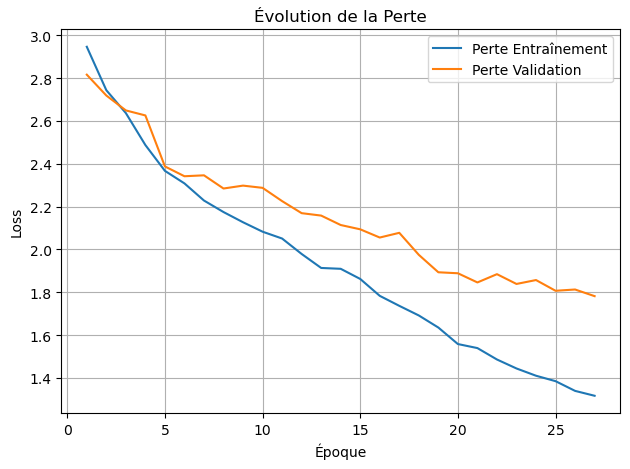

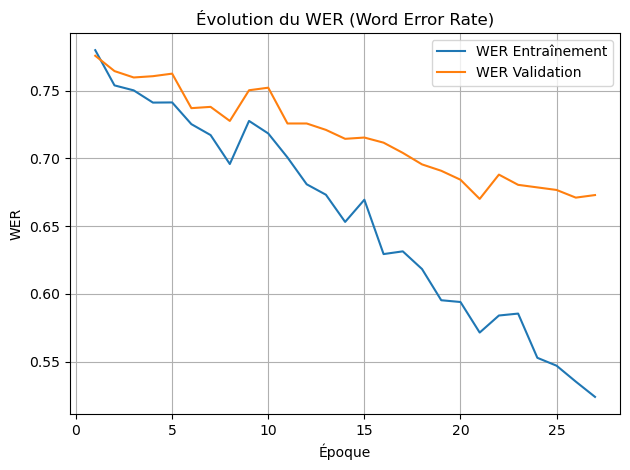

In [77]:
import matplotlib.pyplot as plt
epochs = list(range(1, len(train_losses) + 1))

# 📉 Courbe des pertes (Loss)
plt.figure()
plt.plot(epochs, train_losses, label='Perte Entraînement')
plt.plot(epochs, val_losses, label='Perte Validation')
plt.title("Évolution de la Perte")
plt.xlabel("Époque")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧠 Courbe du Word Error Rate (WER)
plt.figure()
plt.plot(epochs, wer_train, label='WER Entraînement')
plt.plot(epochs, wer_val, label='WER Validation')
plt.title("Évolution du WER (Word Error Rate)")
plt.xlabel("Époque")
plt.ylabel("WER")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 9.evaluation

In [124]:
# Vérification du contenu du test_loader
for batch in test_loader:
    if batch is None or len(batch) == 0:
        print("❌ Batch vide ou invalide.")
        continue

    if len(batch) != 4:
        print(f"❌ Format inattendu du batch : attendu 4 éléments (mel, target, input_lens, target_lens), obtenu {len(batch)}")
        continue

    mel, target, input_lens, target_lens = batch

    print("✅ Batch trouvé avec données valides :")
    print(f"- mel: {mel.shape}")            # [B, T, F]
    print(f"- target: {target.shape}")      # [B, L]
    print(f"- input_lens: {input_lens}")    # liste des longueurs réelles d’entrée
    print(f"- target_lens: {target_lens}")  # liste des longueurs cibles

    # Afficher un exemple brut
    print("\nExemple brut :")
    print("→ mel[0].shape :", mel[0].shape)
    print("→ target[0] :", target[0])
    print("→ input_lens[0] :", input_lens[0])
    print("→ target_lens[0] :", target_lens[0])
    break  # On ne regarde que le premier batch


✅ Batch trouvé avec données valides :
- mel: torch.Size([8, 48, 80])
- target: torch.Size([8, 4])
- input_lens: tensor([37, 41, 37, 48, 47, 37, 40, 48])
- target_lens: tensor([4, 3, 3, 3, 4, 3, 3, 3])

Exemple brut :
→ mel[0].shape : torch.Size([48, 80])
→ target[0] : tensor([  6, 238, 309, 314])
→ input_lens[0] : tensor(37)
→ target_lens[0] : tensor(4)


In [126]:
def evaluate_seq2seq(model, loader, vocab_inv, pad_idx=0):
    model.eval()
    predictions, references = [], []

    with torch.no_grad():
        for mel, target, input_lens, target_lens in loader:
            if mel is None or target is None:
                continue  # Sécurité

            mel = mel.to(model.device if hasattr(model, "device") else "cuda" if torch.cuda.is_available() else "cpu")
            target = target.to(mel.device)

            output = model(mel, max_len=target.shape[1])  # [B, L, Vocab]
            pred_tokens = output.argmax(dim=-1).cpu()     # [B, L]

            for i in range(len(mel)):
                # Prédiction
                pred_seq = pred_tokens[i].tolist()
                pred_seq = [p for p in pred_seq if p != pad_idx]
                decoded_pred = [vocab_inv.get(p, "") for p in pred_seq]

                # Référence
                ref_seq = target[i][:target_lens[i]].tolist()
                decoded_ref = [vocab_inv.get(t, "") for t in ref_seq]

                predictions.append(" ".join(decoded_pred))
                references.append(" ".join(decoded_ref))

    # Sécurité : éviter la division par zéro
    if len(references) == 0:
        print("[⚠️] Aucune référence trouvée. Vérifie le contenu du test_loader.")
        return {"WER": None, "CER": None, "SER": None}

    # Afficher un exemple pour vérification
    print("\n✅ Exemple de prédiction :")
    print("PRED :", predictions[0])
    print("REF  :", references[0])

    return {
        "WER": wer(references, predictions),
        "CER": cer(references, predictions),
        "SER": sum([p != r for p, r in zip(predictions, references)]) / len(references)
    }


In [127]:
results = evaluate_seq2seq(model, test_loader, vocab_inv, pad_idx=PAD_IDX)
print(f"WER : {results['WER']:.4f}")
print(f"CER : {results['CER']:.4f}")
print(f"SER : {results['SER']:.4f}")



✅ Exemple de prédiction :
PRED : N|haut tí |haut ∅|∅
REF  : N|bas tí |haut ∅|∅
WER : 0.6302
CER : 0.4279
SER : 0.9583


# 10. Visualisation

In [131]:
print(test.columns)


Index(['WordId', 'Yemba', 'Speaker', 'GroupeId', 'Statement', 'Syllabe 1',
       'Tone 1', 'Syllabe 2', 'Tone 2', 'Syllabe 3', 'Tone 3', 'path',
       'syllable_transcript', 'encoded', 'exists'],
      dtype='object')


In [132]:
# Adaptation du YembaSataset et collate_fn pour qu'il retourne aussi les chemins des fichiers

class YembaDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        mel = extract_melspectrogram(row["path"])
        label = torch.tensor(row["encoded"], dtype=torch.long)
        return mel, label, row["path"]



def collate_fn(batch):
    mels, labels, paths = zip(*batch)
    input_lengths = [mel.shape[0] for mel in mels]
    label_lengths = [len(label) for label in labels]

    mels_padded = nn.utils.rnn.pad_sequence(mels, batch_first=True)  # [B, T, F]
    labels_cat = torch.cat(labels)

    return mels_padded, labels_cat, torch.tensor(input_lengths), torch.tensor(label_lengths), list(paths)

test_loader = DataLoader(
    YembaDataset(test), 
    batch_size=8, 
    collate_fn=collate_fn
)


In [139]:
def clean_prediction(pred_list):
    cleaned = []
    for token in pred_list:
        if "|" in token:
            base = token.split("|")[0]
        else:
            base = token
        if base.strip() == "" or base == "∅":
            continue
        cleaned.append(base)
    return "".join(cleaned)

results = []

In [140]:
model.eval()
with torch.no_grad():
    for mel, target, input_lens, target_lens, paths in test_loader:
        mel = mel.to(device)
        output = model(mel).log_softmax(2)
        pred = output.argmax(2).cpu()

        start = 0
        for i in range(len(mel)):
            pred_seq = pred[i][:input_lens[i]].tolist()
            decoded_pred = [vocab_inv.get(p, "") for p in pred_seq if p != 0]

            t_len = target_lens[i]
            ref_seq = target[start:start + t_len]
            decoded_ref = [vocab_inv.get(t.item(), "") for t in ref_seq]

            results.append({
                "fichier_audio": os.path.basename(paths[i]),
                "prediction": clean_prediction(decoded_pred),
                "reference": clean_prediction(decoded_ref)
            })

            start += t_len

df_resultats = pd.DataFrame(results)
pd.set_option("display.max_colwidth", None)


In [146]:
print(len(df_resultats))
df_resultats.head(10)

336


,fichier_audio,prediction,reference
0,spkr_5_group_79_statement_3.wav,Ntí,Ntí
1,spkr_11_group_49_statement_1.wav,ntshɛ̄,ntshɛ
2,spkr_3_group_111_statement_1.wav,akūp,akem
3,spkr_8_group_36_statement_2.wav,ntɔ́ŋ,ntɔ̄ŋ
4,spkr_1_group_76_statement_1.wav,Ntí,Nchʉ̄
5,spkr_1_group_20_statement_2.wav,mbúŋ,mbɛ̄
6,spkr_4_group_15_statement_2.wav,mbēŋ,mbǝ̄
7,spkr_8_group_121_statement_2.wav,Lekwɛt,Lekwɛ̄
8,spkr_9_group_48_statement_2.wav,Ntí,ntshí
9,spkr_7_group_70_statement_2.wav,Lekūp,Lewhʉ


In [142]:
df_correct = df_resultats[df_resultats["prediction"] == df_resultats["reference"]]

In [145]:
print(len(df_correct))
df_correct


29


,fichier_audio,prediction,reference
0,spkr_5_group_79_statement_3.wav,Ntí,Ntí
27,spkr_8_group_1_statement_3.wav,apá,apá
30,spkr_3_group_61_statement_2.wav,Sésā,Sésā
46,spkr_6_group_96_statement_2.wav,Lefɛ̄t,Lefɛ̄t
53,spkr_1_group_132_statement_1.wav,alúŋ,alúŋ
62,spkr_8_group_38_statement_2.wav,ntǝ̄,ntǝ̄
75,spkr_11_group_61_statement_2.wav,Sésā,Sésā
77,spkr_9_group_16_statement_4.wav,mbí,mbí
102,spkr_6_group_15_statement_2.wav,mbǝ̄,mbǝ̄
111,spkr_4_group_38_statement_1.wav,ntǝ̄,ntǝ̄


In [147]:
accuracy = len(df_correct) / len(df_resultats)
print(f"Exact Match Accuracy : {accuracy:.2%}")


Exact Match Accuracy : 8.63%
